<a href="https://colab.research.google.com/github/Piyush2102020/Countvectorizer_google_collab/blob/main/Countvectorizer_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook got a simple project and implementation for pytorch with the count vectorizer :-**

1) Starting with the import of important libraries


*   torch,torch.nn
*   sklearn Count vectorizer
*   Matplot
*   pandas

pandas for reading data from the csv file

*Note :- The csv got another cols example label val and emotion of the sentence*

Thus you can read them accordingly



In [ ]:
import torch
import torch.nn as nn

torch.__version__
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

##Get dataset from the files and get pandas to read that data

In [ ]:
import pandas as pd
data=pd.read_csv('data_set.csv')
data.iloc[1]

dialog            you know that is tempting but is really not g...
act                                                              4
emotion                                                          0
act_label                                               commissive
emotion_label                                           no emotion
Name: 1, dtype: object

In [ ]:
sentence,label=data['dialog'],data['act']

***Importing Module***
now inherit the nn.Module from the library the module contains all the required functions for a neural network


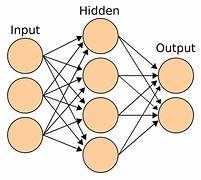

The input features are the number of neuron in each layer and the hidden layer is the number of neuron in the hidden layer


That means :- AxB where the A is number of rows and the B is number of cols for example if the text is "Hello World" and it is decribed as [0,0,1,0,3]
so it will be the the number of input features

In [ ]:
class modelM1(nn.Module):
  def __init__(self,in_features,hidden,out_features):
    super(modelM1,self).__init__()
    self.classify=nn.Sequential(nn.Linear(in_features=in_features,out_features=hidden),
                                nn.Linear(in_features=hidden,out_features=hidden),
                                nn.Linear(in_features=hidden,out_features=out_features))
  def forward(self,x):
    return self.classify(x).to(device)

Now import the vectorizer and fit the data on it we got the dataset of 87000 rows which is very big thats why i had used 10000 text only

**Remember the features size will increase if the dataset increase with unique words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()
sent_list=sentence[:10000]
vectorized=count.fit(sent_list)

sent=count.transform(sent_list).toarray()


In [ ]:
tensor_sent=torch.from_numpy(sent).type(torch.float).requires_grad_(True).to(device)
#putting the labels to tensor

In [ ]:
tensor_sent.shape[1]

6871

importing the dataloader and dataset

**As already mentioned the dataset will be too big that can cause
processing issue and backward propagation so we are creating batches of data of size**

32x features that means the text is represented in 6000 cols each word at the index and 32 sentences will be taken as one

32x 6000 the size of a single batch

In [ ]:
from torch.utils.data import DataLoader,Dataset

now we need the dataset for creating a touple object for the sentences and their corresponding labels to shuffle and divide data

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        return self.features[index], self.labels[index]


In [ ]:
label_c=label[:10000]
tensor_label=torch.tensor(label_c)
tensor_label.shape

torch.Size([10000])

In [ ]:
dataset=CustomDataset(tensor_sent,label_c) #creating the dataset with 10000 sentences and corresponding labels

In [ ]:
print(dataset)

**setting up the loss function and optimizer with the number of neuron**

In [ ]:
loss_fn=nn.CrossEntropyLoss()
hidden=20
out=len(torch.unique(tensor_label))
in_features=tensor_sent.shape[1]
model=modelM1(in_features=in_features,hidden=hidden,out_features=out)
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.3)

In [ ]:
loader=DataLoader(dataset,shuffle=True,batch_size=32)
len(loader)

313

In [ ]:
import os

# Set the CUDA_LAUNCH_BLOCKING environment variable
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"


Now there is the number of epoch and the batch each batch contain 32 rows and 6000 cols in the loader the 10000 rows of sentences are divided into 32 rows tensor with corresponding labels
we are using the crossentropylossas it is multiclass classification the crossentropy does not need softmazx activation

In [ ]:
model.to(device)
model.train
loss_list=[]
for epoch in range(5):
  sentence_count=0
  loss=0
  for batch in loader:
    x_sentence,x_label=batch
    x_pred=model(x_sentence.to(device))
    x_label=x_label.to(device)-1
    loss_c=loss_fn(x_pred,x_label)
    sentence_count += x_sentence.size(0)
    loss+=loss_c
    loss_list.append(loss.item())

    if sentence_count >= 400:
        print(f"Sentences processed: {sentence_count}, Loss: {loss.item()}")
        # Reset the sentence count
        sentence_count = 0

  optimizer.zero_grad()

  loss=loss/len(batch)
  print(loss)
  loss.backward()
  optimizer.step()



Sentences processed: 416, Loss: 2017.885986328125
Sentences processed: 416, Loss: 3953.389404296875
Sentences processed: 416, Loss: 5819.306640625
Sentences processed: 416, Loss: 7636.68115234375
Sentences processed: 416, Loss: 9605.556640625
Sentences processed: 416, Loss: 11555.640625
Sentences processed: 416, Loss: 13584.21484375
Sentences processed: 416, Loss: 15439.9921875
Sentences processed: 416, Loss: 17241.37890625
Sentences processed: 416, Loss: 19045.927734375
Sentences processed: 416, Loss: 20995.83203125
Sentences processed: 416, Loss: 22905.111328125
Sentences processed: 416, Loss: 24724.61328125
Sentences processed: 416, Loss: 26537.529296875
Sentences processed: 416, Loss: 28466.349609375
Sentences processed: 416, Loss: 30415.2109375
Sentences processed: 416, Loss: 32338.4921875
Sentences processed: 416, Loss: 34271.00390625
Sentences processed: 416, Loss: 36143.87109375
Sentences processed: 416, Loss: 37905.38671875
Sentences processed: 416, Loss: 39868.94921875
Senten

Now we are just watching the loss you can change the data this was just an implementation of some pytorch and other library function with an overview of some things in neural network

Thanks for reading

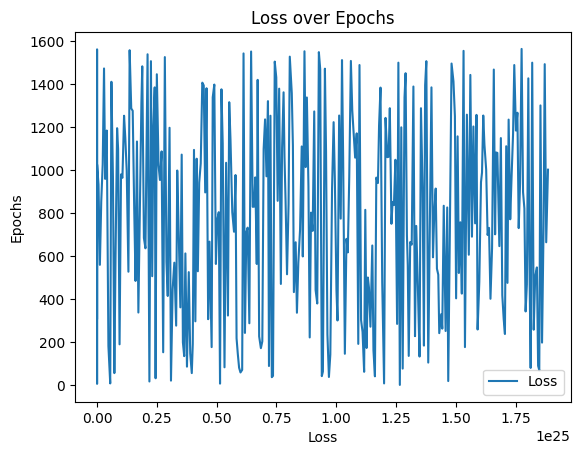

In [ ]:
import matplotlib.pyplot as plt
import torch

# Assuming loss_list is a list or a tensor containing your loss values

# Generate random epochs (you might want to replace this with your actual epoch values)
epochs = torch.randint(0, len(loss_list), size=(len(loss_list),))

# Plot the loss values against the epochs
plt.plot(loss_list, epochs, label='Loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.title('Loss over Epochs')
plt.legend()
plt.show()


In [ ]:
from google.colab import files
files.upload()

TypeError: 'NoneType' object is not subscriptable